In [2]:
import sys
import os
import math

sys.path.insert(0,'../../..')
sys.path.insert(0,'../../../py')
import parameters
import utilities
from spectrogram_utilities import spectrogram_plot
import output_utilities
from spectrogram_output_visualiser import spectrogram_cut, spectrogram_cut_augmented, spectrogram_and_output

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy import stats, misc, signal
from PIL import Image
from sklearn import preprocessing

# matplotlib.get_backend()
%matplotlib inline

awd_event = 1
site = parameters.sites[0]

2013-06-27UT22:04:56.58211922.marion.vr2


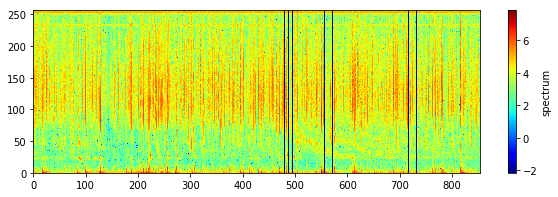

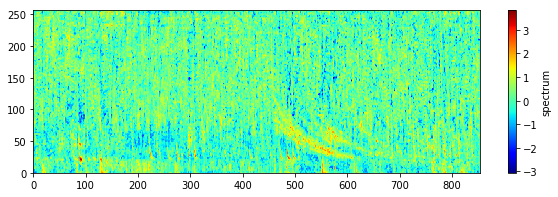

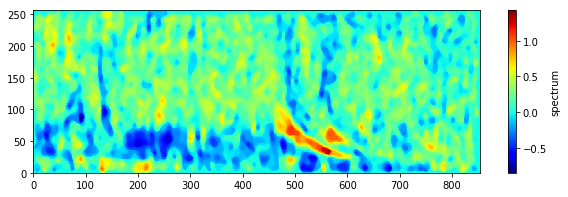

488
(564, 33)


In [24]:
file = utilities.random_file(awd_event, site)
# file = '2013-05-28UT14:08:19.75372164.marion.vr2'
# file = '2013-07-29UT14:20:35.28291914.marion.vr2'

print(file)

# display spectrograms
indices, time, freq , spectrogram = spectrogram_and_output(awd_event,site, file,zscore=False,output=True)
_ = spectrogram_plot(spectrogram, size=(10,3))
indices, time, freq , spectrogram = spectrogram_and_output(awd_event,site, file,zscore=True, medfilt=True, output=False)
_ = spectrogram_plot(spectrogram, size=(10,3))

for i in range(3):
    spectrogram = signal.medfilt2d(spectrogram, (9,9))
    
# print(len(np.argwhere(spectrogram > (np.mean(spectrogram)+ 3*np.std(spectrogram)))))
# print(len(np.argwhere(spectrogram > spectrogram.max()*0.99)))
y = int(spectrogram.argmax()/time.shape)
x = (spectrogram.argmax()%time.shape)[0]
spectrogram[:,x] = np.full(spectrogram[:,0].shape, spectrogram.min())
spectrogram[y,:] = np.full(spectrogram[0,:].shape, spectrogram.min())
_ = spectrogram_plot(spectrogram, size=(10,3))
print(indices[indices[:,-1].argmax()][0])
print((x,y))

In [23]:
indices[indices[:,-1].argmax()][0]

'141'